## Import Library

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
from wordcloud import WordCloud
import requests
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading Dataset

In [3]:
df = pd.read_csv("./dataset/bitcoin_news_sentiments.csv")
df.head()

,Date,Description,Short Description,Accurate Sentiments
0,2024-05-08,"According to U.Today, Bitcoin continues to str...",Bitcoin is struggling to break through the 26-...,-0.998424
1,2024-05-08,"According to U.Today, Samson Mow, the former C...","According to U.S. Mow, the former Chief Securi...",0.999425
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo...",High-net-worth Bitcoin holders have been aggre...,0.998922
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae...","Bitcoin's price has fluctuated between $65,500...",-0.997264
4,2024-05-07,"According to U.Today, Lucie, a member of the S...",Shiba Inu (SHIB) and Bitcoin (BTC) are showing...,0.999674


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 1070 non-null   object 
 1   Description          1070 non-null   object 
 2   Short Description    1070 non-null   object 
 3   Accurate Sentiments  1070 non-null   float64
dtypes: float64(1), object(3)
memory usage: 33.6+ KB


In [5]:
df.isnull().sum()

Date                   0
Description            0
Short Description      0
Accurate Sentiments    0
dtype: int64

In [6]:
clean_df = df.drop_duplicates()
clean_df.shape

(1070, 4)

In [7]:

clean_df = clean_df[["Date", "Description"]]
clean_df

,Date,Description
0,2024-05-08,"According to U.Today, Bitcoin continues to str..."
1,2024-05-08,"According to U.Today, Samson Mow, the former C..."
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo..."
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae..."
4,2024-05-07,"According to U.Today, Lucie, a member of the S..."
...,...,...
1065,2023-12-30,"According to CryptoPotato, the cryptocurrency ..."
1066,2023-12-11,"According to Foresight News, a trader reported..."
1067,2023-12-07,"According to Coincu, discussions between US fi..."
1068,2023-12-07,According to Cointelegraph: Bitcoin investors ...


In [8]:
clean_df["Date"] = pd.to_datetime(clean_df["Date"]).dt.strftime("%Y-%m-%d")
clean_df.head()

,Date,Description
0,2024-05-08,"According to U.Today, Bitcoin continues to str..."
1,2024-05-08,"According to U.Today, Samson Mow, the former C..."
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo..."
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae..."
4,2024-05-07,"According to U.Today, Lucie, a member of the S..."


## Data Preprocessing 

In [9]:
def cleaningText(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) 
    text = re.sub(r"#[A-Za-z0-9]+", "", text) 
    text = re.sub(r"RT[\s]", "", text) 
    text = re.sub(r"http\S+", "", text) 
    text = re.sub(r"[0-9]+", "", text) 
    text = re.sub(r"[^\w\s]", "", text)  
    text = text.replace("\n", " ")  
    text = text.translate(str.maketrans("", "", string.punctuation))  
    text = text.strip(" ") 
    return text

def caseFolding(text):
    text = text.lower()
    return text

def tokenizingtext(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words("english"))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in text]
    stemmed_words = " ".join(stemmed_words)
    return stemmed_words

In [10]:
clean_df["text_clean"] = clean_df["Description"].apply(cleaningText)
clean_df["text_casefolding"] = clean_df["text_clean"].apply(caseFolding)
clean_df["text_tokenizing"] = clean_df["text_casefolding"].apply(tokenizingtext)
clean_df["text_filtering"] = clean_df["text_tokenizing"].apply(filteringText)
clean_df["clean_text"] = clean_df["text_filtering"].apply(stemmingText) 

In [11]:
clean_df.head()

,Date,Description,text_clean,text_casefolding,text_tokenizing,text_filtering,clean_text
0,2024-05-08,"According to U.Today, Bitcoin continues to str...",According to UToday Bitcoin continues to strug...,according to utoday bitcoin continues to strug...,"[according, to, utoday, bitcoin, continues, to...","[according, utoday, bitcoin, continues, strugg...",accord utoday bitcoin continu struggl bearish ...
1,2024-05-08,"According to U.Today, Samson Mow, the former C...",According to UToday Samson Mow the former Chie...,according to utoday samson mow the former chie...,"[according, to, utoday, samson, mow, the, form...","[according, utoday, samson, mow, former, chief...",accord utoday samson mow former chief secur of...
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo...",According to UToday Bitcoin analyst Willy Woo ...,according to utoday bitcoin analyst willy woo ...,"[according, to, utoday, bitcoin, analyst, will...","[according, utoday, bitcoin, analyst, willy, w...",accord utoday bitcoin analyst willi woo highli...
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae...",According to UToday MicroStrategy CEO Michael ...,according to utoday microstrategy ceo michael ...,"[according, to, utoday, microstrategy, ceo, mi...","[according, utoday, microstrategy, ceo, michae...",accord utoday microstrategi ceo michael saylor...
4,2024-05-07,"According to U.Today, Lucie, a member of the S...",According to UToday Lucie a member of the Shib...,according to utoday lucie a member of the shib...,"[according, to, utoday, lucie, a, member, of, ...","[according, utoday, lucie, member, shiba, inu,...",accord utoday luci member shiba inu team urg c...


## Labeling Data

### TextBlop

In [12]:
def textLabeling(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"
    

In [13]:
polarity = clean_df["clean_text"].apply(textLabeling)
labeled_df = clean_df.copy()
labeled_df["polarity"] = polarity

In [14]:
labeled_df.head()

,Date,Description,text_clean,text_casefolding,text_tokenizing,text_filtering,clean_text,polarity
0,2024-05-08,"According to U.Today, Bitcoin continues to str...",According to UToday Bitcoin continues to strug...,according to utoday bitcoin continues to strug...,"[according, to, utoday, bitcoin, continues, to...","[according, utoday, bitcoin, continues, strugg...",accord utoday bitcoin continu struggl bearish ...,negative
1,2024-05-08,"According to U.Today, Samson Mow, the former C...",According to UToday Samson Mow the former Chie...,according to utoday samson mow the former chie...,"[according, to, utoday, samson, mow, the, form...","[according, utoday, samson, mow, former, chief...",accord utoday samson mow former chief secur of...,positive
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo...",According to UToday Bitcoin analyst Willy Woo ...,according to utoday bitcoin analyst willy woo ...,"[according, to, utoday, bitcoin, analyst, will...","[according, utoday, bitcoin, analyst, willy, w...",accord utoday bitcoin analyst willi woo highli...,negative
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae...",According to UToday MicroStrategy CEO Michael ...,according to utoday microstrategy ceo michael ...,"[according, to, utoday, microstrategy, ceo, mi...","[according, utoday, microstrategy, ceo, michae...",accord utoday microstrategi ceo michael saylor...,positive
4,2024-05-07,"According to U.Today, Lucie, a member of the S...",According to UToday Lucie a member of the Shib...,according to utoday lucie a member of the shib...,"[according, to, utoday, lucie, a, member, of, ...","[according, utoday, lucie, member, shiba, inu,...",accord utoday luci member shiba inu team urg c...,positive


In [15]:
print(labeled_df["polarity"].value_counts())

polarity
positive    488
neutral     329
negative    253
Name: count, dtype: int64


## Data Visualization

In [16]:
sentiment_summary = labeled_df["polarity"].value_counts().reset_index()
sentiment_summary.columns = ["sentiment", "total"]
sentiment_summary

,sentiment,total
0,positive,488
1,neutral,329
2,negative,253


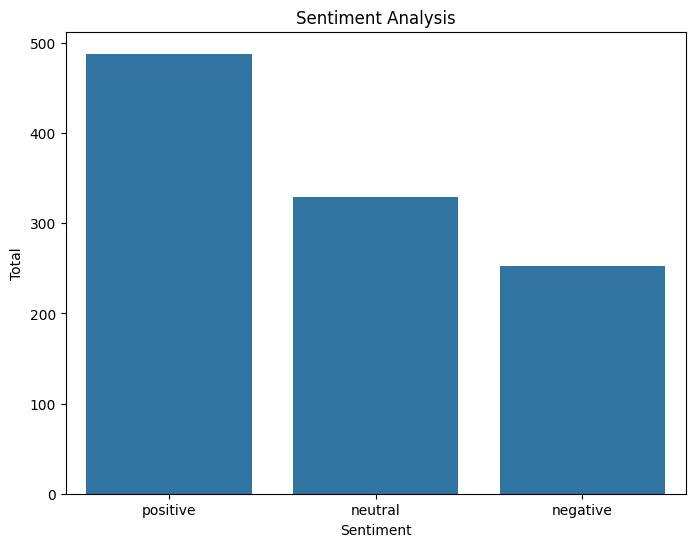

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x="sentiment",
            y="total",
            data=sentiment_summary)
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Total")
plt.show()

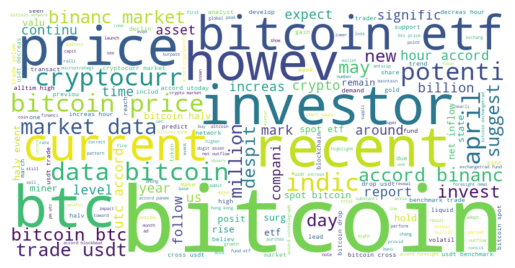

In [18]:
text = " ".join(labeled_df["clean_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.Figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
def wordCloudVisualization(df, sentiment):
    text = " ".join(df[df["polarity"] == sentiment]["clean_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.Figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {''.join(sentiment)} Sentiment")
    plt.show()

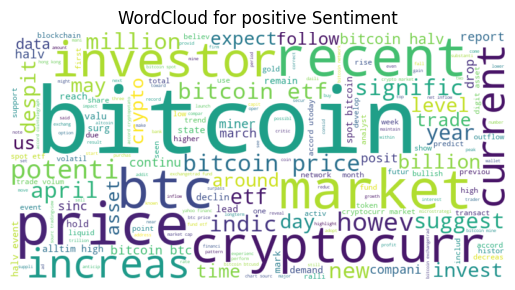

In [20]:
wordCloudVisualization(labeled_df, "positive")

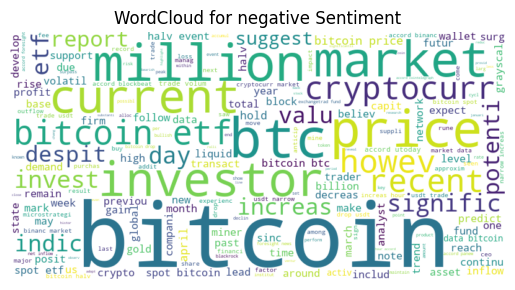

In [21]:
wordCloudVisualization(labeled_df, "negative")

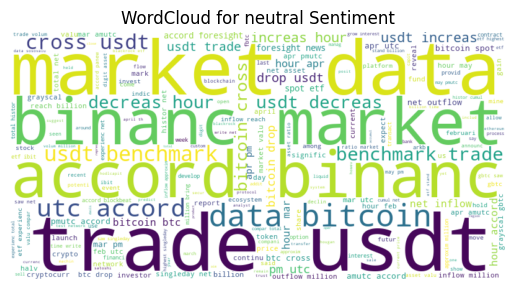

In [22]:
wordCloudVisualization(labeled_df, "neutral")

## Features Extraction

In [23]:
X = labeled_df["clean_text"]
y = labeled_df["polarity"]

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

transform_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
transform_df

,activ,addit,address,alltim,also,among,amount,analyst,anticip,approv,...,utoday,valu,volatil,volum,wallet,week,within,worth,would,year
0,0.000000,0.000000,0.000000,0.000000,0.160760,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102704,0.083806,0.000000,0.120514,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.207971,0.000000,0.000000,0.000000,0.000000,0.000000,0.114646,...,0.101310,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
2,0.171582,0.000000,0.195443,0.000000,0.062593,0.163208,0.000000,0.072328,0.085227,0.000000,...,0.079977,0.000000,0.000000,0.000000,0.0,0.000000,0.087878,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107467,0.000000,0.000000,...,0.118833,0.096968,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
4,0.113651,0.000000,0.000000,0.000000,0.082920,0.108104,0.000000,0.000000,0.000000,0.000000,...,0.105949,0.172909,0.104493,0.000000,0.0,0.092124,0.116415,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.000000,0.081202,0.000000,0.079227,0.120822,0.078759,0.000000,0.000000,0.082255,0.262048,...,0.000000,0.125972,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.080442,0.000000
1066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
1067,0.000000,0.000000,0.000000,0.000000,0.000000,0.099936,0.000000,0.088576,0.000000,0.221673,...,0.000000,0.000000,0.000000,0.000000,0.0,0.085163,0.000000,0.0,0.306214,0.000000
1068,0.000000,0.000000,0.000000,0.095269,0.000000,0.000000,0.103470,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.161412,0.101987,0.0,0.000000,0.224281


## Data Splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42
)

In [25]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (856, 200)
X_test shape: (214, 200)
y_train shape: (856,)
y_test shape: (214,)


## Modeling

### Naive Bayes

In [26]:
naive_bayes = BernoulliNB()

naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

In [27]:
print("Naive Bayes - accuracy_train:", accuracy_train_nb)
print("Naive Bayes - accuracy_test:", accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7009345794392523
Naive Bayes - accuracy_test: 0.6308411214953271


### Random Forest 

In [28]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

In [29]:
print("Random Forest - accuracy_train:", accuracy_train_rf)
print("Random Forest - accuracy_test:", accuracy_test_rf)

Random Forest - accuracy_train: 0.9941588785046729
Random Forest - accuracy_test: 0.7757009345794392


### Logistic Regression

In [30]:
logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

In [31]:
print("Logistic Regression - accuracy_train:", accuracy_train_lr)
print("Logistic Regression - accuracy_test:", accuracy_test_lr)

Logistic Regression - accuracy_train: 0.802570093457944
Logistic Regression - accuracy_test: 0.6869158878504673


### MLP

In [32]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    max_iter=500, activation="relu",
                    solver="adam", random_state=42)

mlp.fit(X_train.toarray(), y_train)

y_pred_train_mlp = mlp.predict(X_train.toarray())
y_pred_test_mlp = mlp.predict(X_test.toarray())

accuracy_train_mlp = accuracy_score(y_pred_train_mlp, y_train)
accuracy_test_mlp = accuracy_score(y_pred_test_mlp, y_test)

In [33]:
print("Multilayer Perceptron - accuracy train:", accuracy_train_mlp)
print("Multilayer Perceptron - accuracy test:", accuracy_test_mlp)

Multilayer Perceptron - accuracy train: 0.9941588785046729
Multilayer Perceptron - accuracy test: 0.7149532710280374


## Model Prediction

In [34]:
def make_predictions(models, text_column):
    X_tfid = tfidf.transform(labeled_df[text_column])
    for model_name, model in models.items():
        labeled_df[f"Classification {model_name}"] = model.predict(X_tfid)

In [35]:
models = {
    "Naive Bayes":naive_bayes, 
    "Random Forest": random_forest, 
    "Logistic Regression": logistic_regression,
    "Multilayer Perceptron": mlp,
}

make_predictions(models, "clean_text")
labeled_df

,Date,Description,text_clean,text_casefolding,text_tokenizing,text_filtering,clean_text,polarity,Classification Naive Bayes,Classification Random Forest,Classification Logistic Regression,Classification Multilayer Perceptron
0,2024-05-08,"According to U.Today, Bitcoin continues to str...",According to UToday Bitcoin continues to strug...,according to utoday bitcoin continues to strug...,"[according, to, utoday, bitcoin, continues, to...","[according, utoday, bitcoin, continues, strugg...",accord utoday bitcoin continu struggl bearish ...,negative,positive,negative,positive,negative
1,2024-05-08,"According to U.Today, Samson Mow, the former C...",According to UToday Samson Mow the former Chie...,according to utoday samson mow the former chie...,"[according, to, utoday, samson, mow, the, form...","[according, utoday, samson, mow, former, chief...",accord utoday samson mow former chief secur of...,positive,positive,positive,positive,positive
2,2024-05-08,"According to U.Today, Bitcoin analyst Willy Wo...",According to UToday Bitcoin analyst Willy Woo ...,according to utoday bitcoin analyst willy woo ...,"[according, to, utoday, bitcoin, analyst, will...","[according, utoday, bitcoin, analyst, willy, w...",accord utoday bitcoin analyst willi woo highli...,negative,positive,positive,positive,negative
3,2024-05-08,"According to U.Today, MicroStrategy CEO Michae...",According to UToday MicroStrategy CEO Michael ...,according to utoday microstrategy ceo michael ...,"[according, to, utoday, microstrategy, ceo, mi...","[according, utoday, microstrategy, ceo, michae...",accord utoday microstrategi ceo michael saylor...,positive,positive,positive,positive,positive
4,2024-05-07,"According to U.Today, Lucie, a member of the S...",According to UToday Lucie a member of the Shib...,according to utoday lucie a member of the shib...,"[according, to, utoday, lucie, a, member, of, ...","[according, utoday, lucie, member, shiba, inu,...",accord utoday luci member shiba inu team urg c...,positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2023-12-30,"According to CryptoPotato, the cryptocurrency ...",According to CryptoPotato the cryptocurrency m...,according to cryptopotato the cryptocurrency m...,"[according, to, cryptopotato, the, cryptocurre...","[according, cryptopotato, cryptocurrency, mark...",accord cryptopotato cryptocurr market experien...,positive,positive,positive,positive,positive
1066,2023-12-11,"According to Foresight News, a trader reported...",According to Foresight News a trader reportedl...,according to foresight news a trader reportedl...,"[according, to, foresight, news, a, trader, re...","[according, foresight, news, trader, reportedl...",accord foresight news trader reportedli short ...,positive,negative,positive,positive,positive
1067,2023-12-07,"According to Coincu, discussions between US fi...",According to Coincu discussions between US fin...,according to coincu discussions between us fin...,"[according, to, coincu, discussions, between, ...","[according, coincu, discussions, us, financial...",accord coincu discuss us financi regul applic ...,negative,positive,negative,positive,negative
1068,2023-12-07,According to Cointelegraph: Bitcoin investors ...,According to Cointelegraph Bitcoin investors f...,according to cointelegraph bitcoin investors f...,"[according, to, cointelegraph, bitcoin, invest...","[according, cointelegraph, bitcoin, investors,...",accord cointelegraph bitcoin investor last yea...,negative,positive,negative,positive,negative


In [36]:
columns = ["Classification Naive Bayes", "Classification Random Forest", "Classification Logistic Regression", "Classification Multilayer Perceptron"]

for column in labeled_df[columns]:
    print("===============================")
    print(labeled_df[column].value_counts())
    print("=============================== \n")

Classification Naive Bayes
positive    448
neutral     409
negative    213
Name: count, dtype: int64

Classification Random Forest
positive    516
neutral     329
negative    225
Name: count, dtype: int64

Classification Logistic Regression
positive    616
neutral     333
negative    121
Name: count, dtype: int64

Classification Multilayer Perceptron
positive    482
neutral     335
negative    253
Name: count, dtype: int64



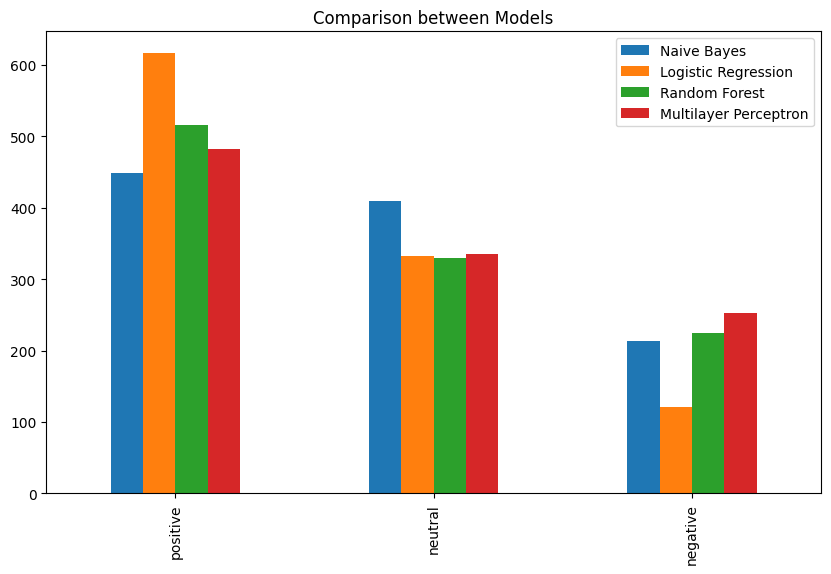

In [37]:
model_counts = pd.DataFrame({
    "Naive Bayes": labeled_df["Classification Naive Bayes"].value_counts(),
    "Logistic Regression": labeled_df["Classification Logistic Regression"].value_counts(),
    "Random Forest": labeled_df["Classification Random Forest"].value_counts(),
    "Multilayer Perceptron": labeled_df["Classification Multilayer Perceptron"].value_counts(),
})

model_counts.plot(kind="bar", figsize=(10,6))
plt.title("Comparison between Models")
plt.legend(loc="best")
plt.show()

## Comparison Beetween Price and sentiment

In [38]:
def get_crypto_price():
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {"vs_currency": "usd", "days": "365", "interval": "daily"}
    response = requests.get(url, params=params).json()
    
    prices = pd.DataFrame(response["prices"], columns=["timestamp", "price"])
    prices["date"] = pd.to_datetime(prices["timestamp"], unit="ms").dt.date
    return prices.groupby("date").mean().reset_index()

price_data = get_crypto_price()

In [39]:
price_data

,date,timestamp,price
0,2024-01-20,1.705709e+12,41600.940933
1,2024-01-21,1.705795e+12,41626.107110
2,2024-01-22,1.705882e+12,41541.899457
3,2024-01-23,1.705968e+12,39504.730058
4,2024-01-24,1.706054e+12,39833.454105
...,...,...,...
360,2025-01-14,1.736813e+12,94456.349375
361,2025-01-15,1.736899e+12,96574.077688
362,2025-01-16,1.736986e+12,100313.152398
363,2025-01-17,1.737072e+12,100044.579268


In [40]:
price_data["date"] = pd.to_datetime(price_data["date"]).dt.strftime("%Y-%m-%d")
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       365 non-null    object 
 1   timestamp  365 non-null    float64
 2   price      365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [41]:
news_data = labeled_df[["Date", "Classification Random Forest"]]
news_data.rename(columns={"Date": "date", "Classification Random Forest": "sentiment"}, inplace=True)
news_data

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10608\420780803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data.rename(columns={"Date": "date", "Classification Random Forest": "sentiment"}, inplace=True)


,date,sentiment
0,2024-05-08,negative
1,2024-05-08,positive
2,2024-05-08,positive
3,2024-05-08,positive
4,2024-05-07,positive
...,...,...
1065,2023-12-30,positive
1066,2023-12-11,positive
1067,2023-12-07,negative
1068,2023-12-07,negative


In [42]:
sentiment_summary = news_data.groupby(["date", "sentiment"]).size().unstack(fill_value=0).reset_index()
sentiment_summary

sentiment,date,negative,neutral,positive
0,2023-05-17,0,0,1
1,2023-12-07,2,0,0
2,2023-12-11,0,0,1
3,2023-12-30,0,0,1
4,2024-01-04,0,0,1
...,...,...,...,...
85,2024-05-04,0,3,6
86,2024-05-05,0,4,4
87,2024-05-06,3,2,8
88,2024-05-07,2,2,5


In [43]:
merged_data = pd.merge(price_data, sentiment_summary, on="date", how="inner")
merged_data

,date,timestamp,price,negative,neutral,positive
0,2024-01-31,1.706659e+12,42892.034530,0,0,4
1,2024-02-01,1.706746e+12,42583.263547,1,2,0
2,2024-02-04,1.707005e+12,42976.848300,0,1,0
3,2024-02-05,1.707091e+12,42599.359971,0,0,1
4,2024-02-06,1.707178e+12,42648.456921,0,0,1
...,...,...,...,...,...,...
79,2024-05-04,1.714781e+12,62839.340736,0,3,6
80,2024-05-05,1.714867e+12,63820.451903,0,4,4
81,2024-05-06,1.714954e+12,64010.008652,3,2,8
82,2024-05-07,1.715040e+12,63172.481296,2,2,5


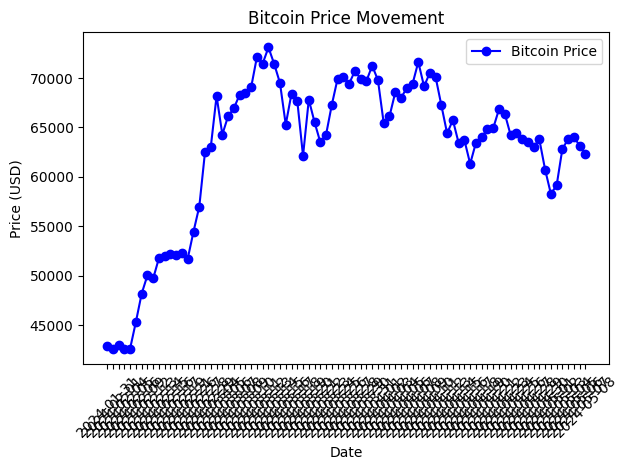

In [44]:
plt.Figure(figsize=(15, 7))
plt.plot(merged_data["date"], merged_data["price"], marker="o", label="Bitcoin Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Bitcoin Price Movement")
plt.legend(loc="best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

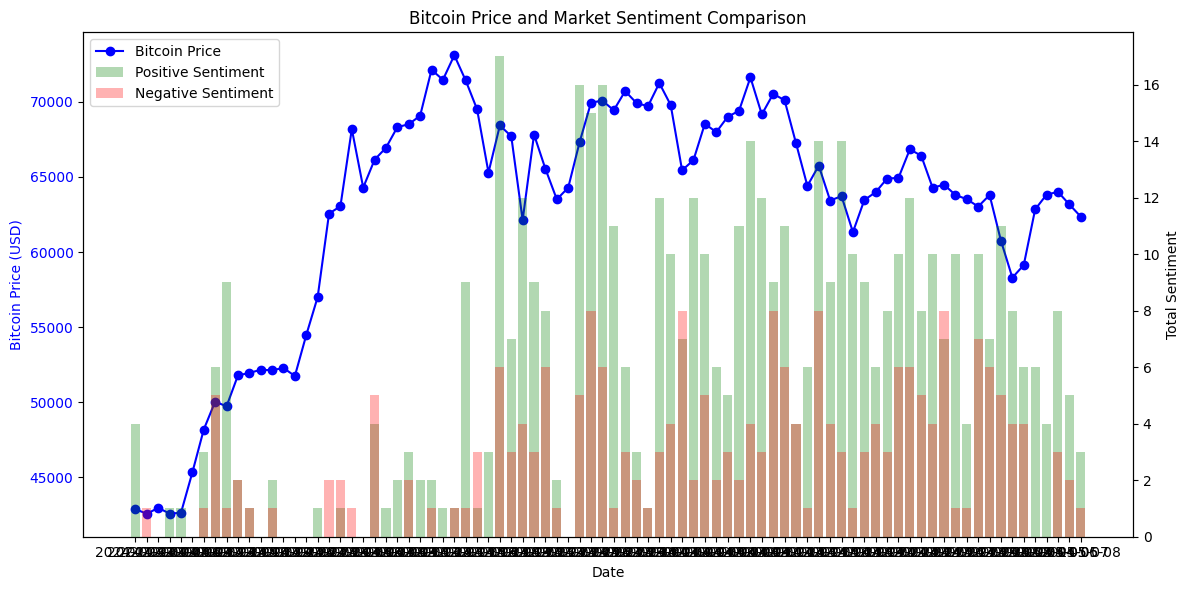

In [45]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(merged_data["date"], merged_data["price"], color="blue", marker="o", label="Bitcoin Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Bitcoin Price (USD)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.bar(merged_data["date"], merged_data["positive"], alpha=0.3, color="green", label="Positive Sentiment")
ax2.bar(merged_data["date"], merged_data["negative"], alpha=0.3, color="red", label="Negative Sentiment")
ax2.set_ylabel("Total Sentiment")

lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
ax1.legend(lines + bars, labels + bar_labels, loc="upper left")

plt.title("Bitcoin Price and Market Sentiment Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

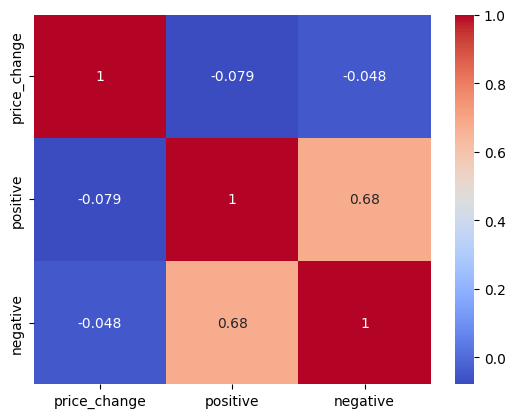

Correlation beetwen Price Change and Positive Sentiment -0.0786998886351729
Correlation beetwen Price Change and Negative Sentiment -0.048166467195831314


In [46]:
merged_data["price_change"] = merged_data["price"].pct_change()
sentiment_pos_neg = merged_data[["price_change", "positive", "negative"]]

correlation_pos =  sentiment_pos_neg["price_change"].corr(sentiment_pos_neg["positive"])
correlation_neg =  sentiment_pos_neg["price_change"].corr(sentiment_pos_neg["negative"])

sns.heatmap(sentiment_pos_neg.corr(), annot=True, cmap="coolwarm")
plt.show()

print(f"Correlation beetwen Price Change and Positive Sentiment {correlation_pos}")
print(f"Correlation beetwen Price Change and Negative Sentiment {correlation_neg}")